# Matematický software - Úloha 2: Ekologický model Lotka-Volterra

Model popisuje interakci dvou druhů:
  - Kořist (např. králíci) – roste přirozeně, ale je lovena
  - Predátor (např. lišky) – přežívá díky kořisti, jinak vymírá

- K výpočtu použijeme následující vzorec:


<img src="rovnice predátora a kořisti.png" alt="Rovnice predátora a kořisti" style="width:50%; max-width:300px;">

Kde:

- x = počet kořisti (např. králíci),

- y = počet predátorů (např. lišky),

- α = míra růstu kořisti (bez predátorů),

- β = míra úbytku kořisti kvůli predátorům,

- γ = úbytek predátorů (bez kořisti),

- δ = míra růstu predátorů díky kořisti.

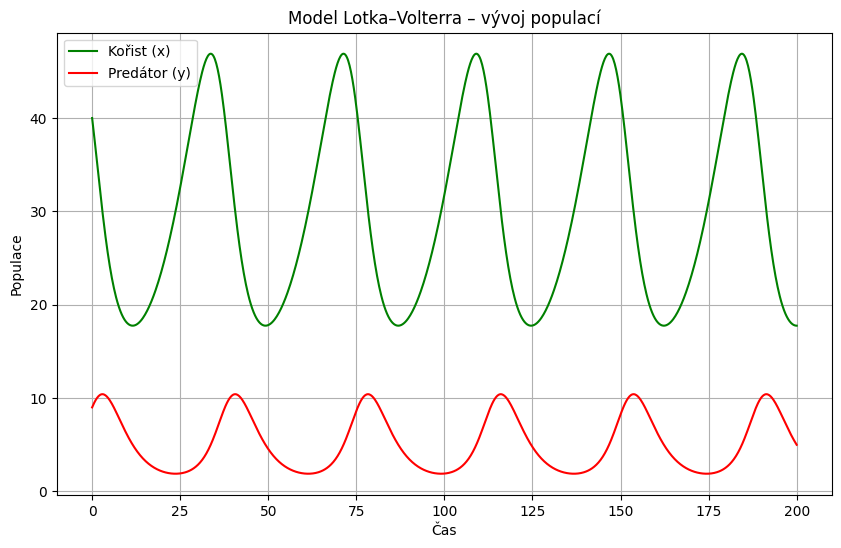

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Lotka-Volterra model (predátor-kořist)
# model popisuje dynamiku dvou populací: predátora a kořisti.


# Parametry modelu (i malá změna drastiky změní výsledek)
alpha = 0.1   # růst kořisti
beta = 0.02   # predátor loví kořist
gamma = 0.3   # úmrtnost predátora
delta = 0.01  # růst predátora díky kořisti

# Počáteční stavy: [kořist, predátor]
x0 = 40   # králíci
y0 = 9    # lišky
initial_state = [x0, y0]

# Časová osa
t = np.linspace(0, 200, 1000)

# Definice rovnic
def lotka_volterra(state, t, alpha, beta, gamma, delta):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Výpočet
solution = odeint(lotka_volterra, initial_state, t, args=(alpha, beta, gamma, delta))
x, y = solution.T

# Graf
plt.figure(figsize=(10,6))
plt.plot(t, x, label='Kořist (x)', color='green')
plt.plot(t, y, label='Predátor (y)', color='red')
plt.xlabel('Čas')
plt.ylabel('Populace')
plt.title('Model Lotka–Volterra – vývoj populací')
plt.legend()
plt.grid(True)
plt.show()


### Poznámky

- Populace kořisti a predátorů vykazují cyklické chování.
- Když počet kořisti (králíků) roste, následuje i růst predátorů (lišek), protože mají dost potravy.
- Jakmile ale predátorů přibude, začnou kořist nadměrně lovit – její počet klesne.
- V reakci na úbytek kořisti klesá i počet predátorů kvůli nedostatku potravy, čímž se cyklus opakuje.

## Přidání třetího druhu

- jako třetí druh přidáme vlka (superpredátora), který loví lišky, ale nežeře kořist (králíky) přímo. rovnice pro vlka bude rovnice z
- K výpočetu použijeme následující vzorec:

<img src="rovnice predátora, superpredátora a kořisti.png" alt="Rovnice predátora a kořisti" style="width:50%; max-width:300px;">

Kde:

- x = počet kořisti (např. králíci),

- y = počet predátorů (např. lišky),

- α = míra růstu kořisti (bez predátorů),

- β = míra úbytku kořisti kvůli predátorům,

- γ = úbytek predátorů (bez kořisti),

- δ = míra růstu predátorů díky kořisti.

- μ = vlk žere lišku (úbytek lišek)

- ν = vlk roste díky lovu lišek

- λ = vlk vymírá bez potravy

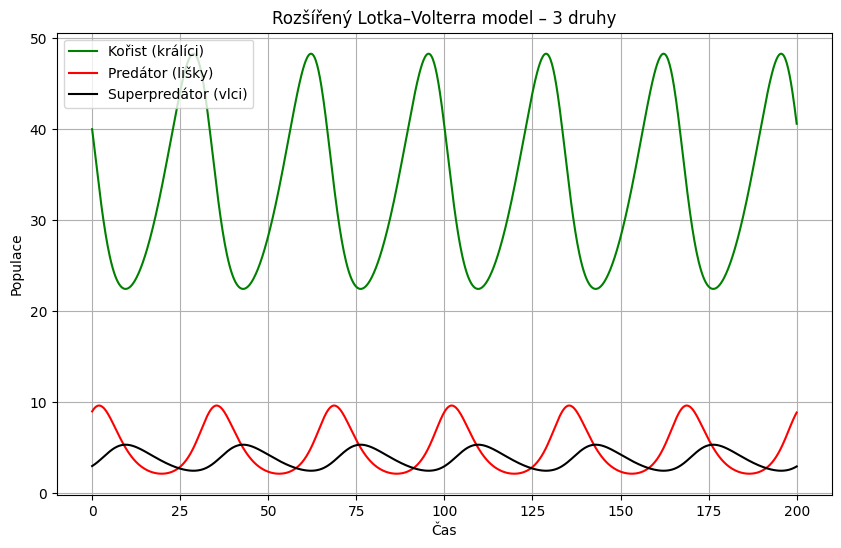

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametry
alpha = 0.1   # růst kořisti (králíci)
beta = 0.02   # lišky loví králíky
gamma = 0.3   # úmrtnost lišek bez potravy
delta = 0.01  # růst lišek díky králíkům

mu = 0.01     # vlci loví lišky
nu = 0.02    # vlci rostou díky liškám
lambd = 0.1   # úmrtnost vlků bez potravy

# Počáteční stavy [kořist, predátor, superpredátor]
x0 = 40   # králíci
y0 = 9    # lišky
z0 = 3    # vlci
initial_state = [x0, y0, z0]

# Časová osa
t = np.linspace(0, 200, 1000)

# Definice systému rovnic pro 3 druhy
def extended_lv(state, t, alpha, beta, gamma, delta, mu, nu, lambd):
    x, y, z = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y - mu * y * z
    dzdt = nu * y * z - lambd * z
    return [dxdt, dydt, dzdt]

# Výpočet 
solution = odeint(extended_lv, initial_state, t, args=(alpha, beta, gamma, delta, mu, nu, lambd))
x, y, z = solution.T

# Graf
plt.figure(figsize=(10,6))
plt.plot(t, x, label='Kořist (králíci)', color='green')
plt.plot(t, y, label='Predátor (lišky)', color='red')
plt.plot(t, z, label='Superpredátor (vlci)', color='black')
plt.xlabel('Čas')
plt.ylabel('Populace')
plt.title('Rozšířený Lotka–Volterra model – 3 druhy')
plt.legend()
plt.grid(True)
plt.show()


### Finální poznámky

- Do klasického Lotka–Volterra modelu jsem přidal třetí druh – superpredátor (vlk), který loví predátory (lišky).

- Tím vznikl trojúrovňový potravní řetězec: králíci → lišky → vlci.

- Nejprve jsem nastavili nízkou míru růstu vlků a běžnou úmrtnost:
   - Výsledek: vlci velmi rychle vymřeli, protože lišek bylo příliš málo na přežití.

- Poté jsem zvýšil růst vlků a snížili jejich úmrtnost:
    - Výsledek: systém se zhroutil, králíci i vlci se nekontrolovaně přemnožili, lišky téměř zmizely.

- Až teprve při úpravě parametrů na přiměřený růst a mírnější regulaci vlků:
    - Systém se stabilizoval – všechny tři druhy přežívají a jejich populace harmonicky oscilují.

- Výsledek ukazuje, že i malá změna v parametrech může zcela změnit chování ekosystému.

- Rozšířený model tak dobře demonstruje citlivost přírodních systémů na počet a vazby mezi druhy.